# Transfer Auto-encoder for Gaussian Domains

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
colormap = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Create the datasets

### Source domain

In [3]:
N_source = 100

In [4]:
mean = [-1, 0]

std = 0.1
cov = np.eye(2) * std

In [5]:
x, y = np.random.multivariate_normal(mean, cov, N_source).T
X_source = np.concatenate([x.reshape(len(x), 1), y.reshape(len(y), 1)], axis=1)

### Target domain

In [6]:
N_target = 100

In [7]:
mean = [1, 0]

std = 0.1
cov = np.eye(2) * std

In [8]:
x, y = np.random.multivariate_normal(mean, cov, N_target).T
X_target = np.concatenate([x.reshape(len(x), 1), y.reshape(len(y), 1)], axis=1)

### Display the dataset

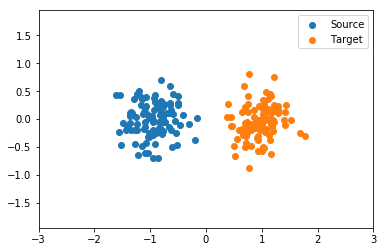

In [9]:
plt.axis("equal")
plt.axis([-3,3,-3,3])

plt.scatter(X_source[:,0], X_source[:,1], label="Source")
plt.scatter(X_target[:,0], X_target[:,1], label="Target")
plt.legend()

## Create the model

### Placeholders

In [10]:
source = tf.placeholder(tf.float32, shape=[None, 2], name='source')
target = tf.placeholder(tf.float32, shape=[None, 2], name='target')

### Discriminator Network

In [11]:
W1 = tf.get_variable('W1', initializer=np.eye(2, dtype="float32"))
b1 = tf.get_variable('b1', shape=[2], initializer=tf.zeros_initializer())

In [12]:
theta = [W1, b1]

In [13]:
def transcoder(x):  
    output = tf.matmul(x, W1) + b1
    
    return output

### Losses and solver

In [14]:
X_output = transcoder(source)

In [15]:
loss = tf.losses.mean_squared_error(target, X_output)

In [16]:
solver = tf.train.AdamOptimizer().minimize(loss, var_list=theta)

## Execute the model

In [92]:
sess = tf.InteractiveSession()

In [93]:
sess.run(tf.global_variables_initializer())
loss_list = []

In [129]:
nb_iter = 1000
nb_samples = 10

for i in range(nb_iter):
    sample_source = X_source[np.random.choice(len(X_source), nb_samples)]
    sample_target = X_target[np.random.choice(len(X_target), nb_samples)]
    _, loss_curr = sess.run([solver, loss],feed_dict={source: sample_source, target: sample_target})
    
    loss_list.append(loss_curr)
    if i % (nb_iter//10) == 0:
        print('Iter: {}'.format(i))
        print('loss: {:.4}'. format(loss_curr))
        print()

Iter: 0
loss: 0.1617

Iter: 100
loss: 0.04597

Iter: 200
loss: 0.06552

Iter: 300
loss: 0.08446

Iter: 400
loss: 0.04271

Iter: 500
loss: 0.1167

Iter: 600
loss: 0.08756

Iter: 700
loss: 0.06708

Iter: 800
loss: 0.08841

Iter: 900
loss: 0.09121



## Display the results

In [130]:
X_source_trans = sess.run(X_output, feed_dict={source: X_source})

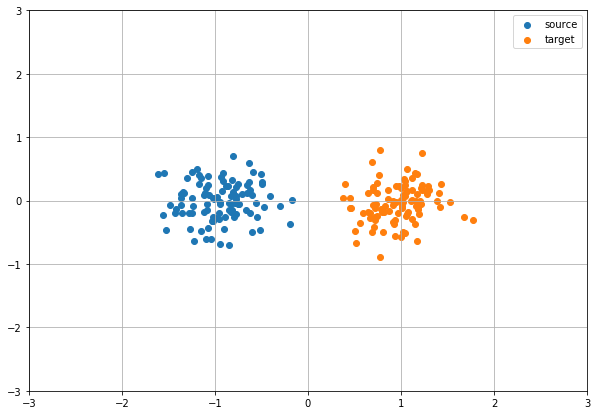

In [132]:
### plt.rcParams['figure.figsize'] = (10, 15)
# plt.axes().set_aspect('equal', 'datalim')
#plt.axis([-3,3,-3,3])

#f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[10, 10]})
plt.rcParams['figure.figsize'] = (10,7)
plt.axis([-3,3,-3,3])
plt.scatter(X_source[:,0], X_source[:,1], label="source")
plt.scatter(X_target[:,0], X_target[:,1], label="target")
#plt.scatter(X_source_trans[:,0], X_source_trans[:,1], label="source transformed")
plt.legend()
plt.grid()
plt.savefig('screenshots/transcoder-step-11')
#a1.plot(loss_list, label="Mean-squared-error")
#a1.legend()